In [1]:
import pandas as pd

In [2]:
colnames = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","una1","una2","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","result"]

In [3]:
corrected = pd.read_csv('kddcup.data_10_percent_corrected',names=colnames)

In [4]:
corrected.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
corrected[pd.isnull(corrected).any(axis=1)]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result


In [6]:
corrected['result'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

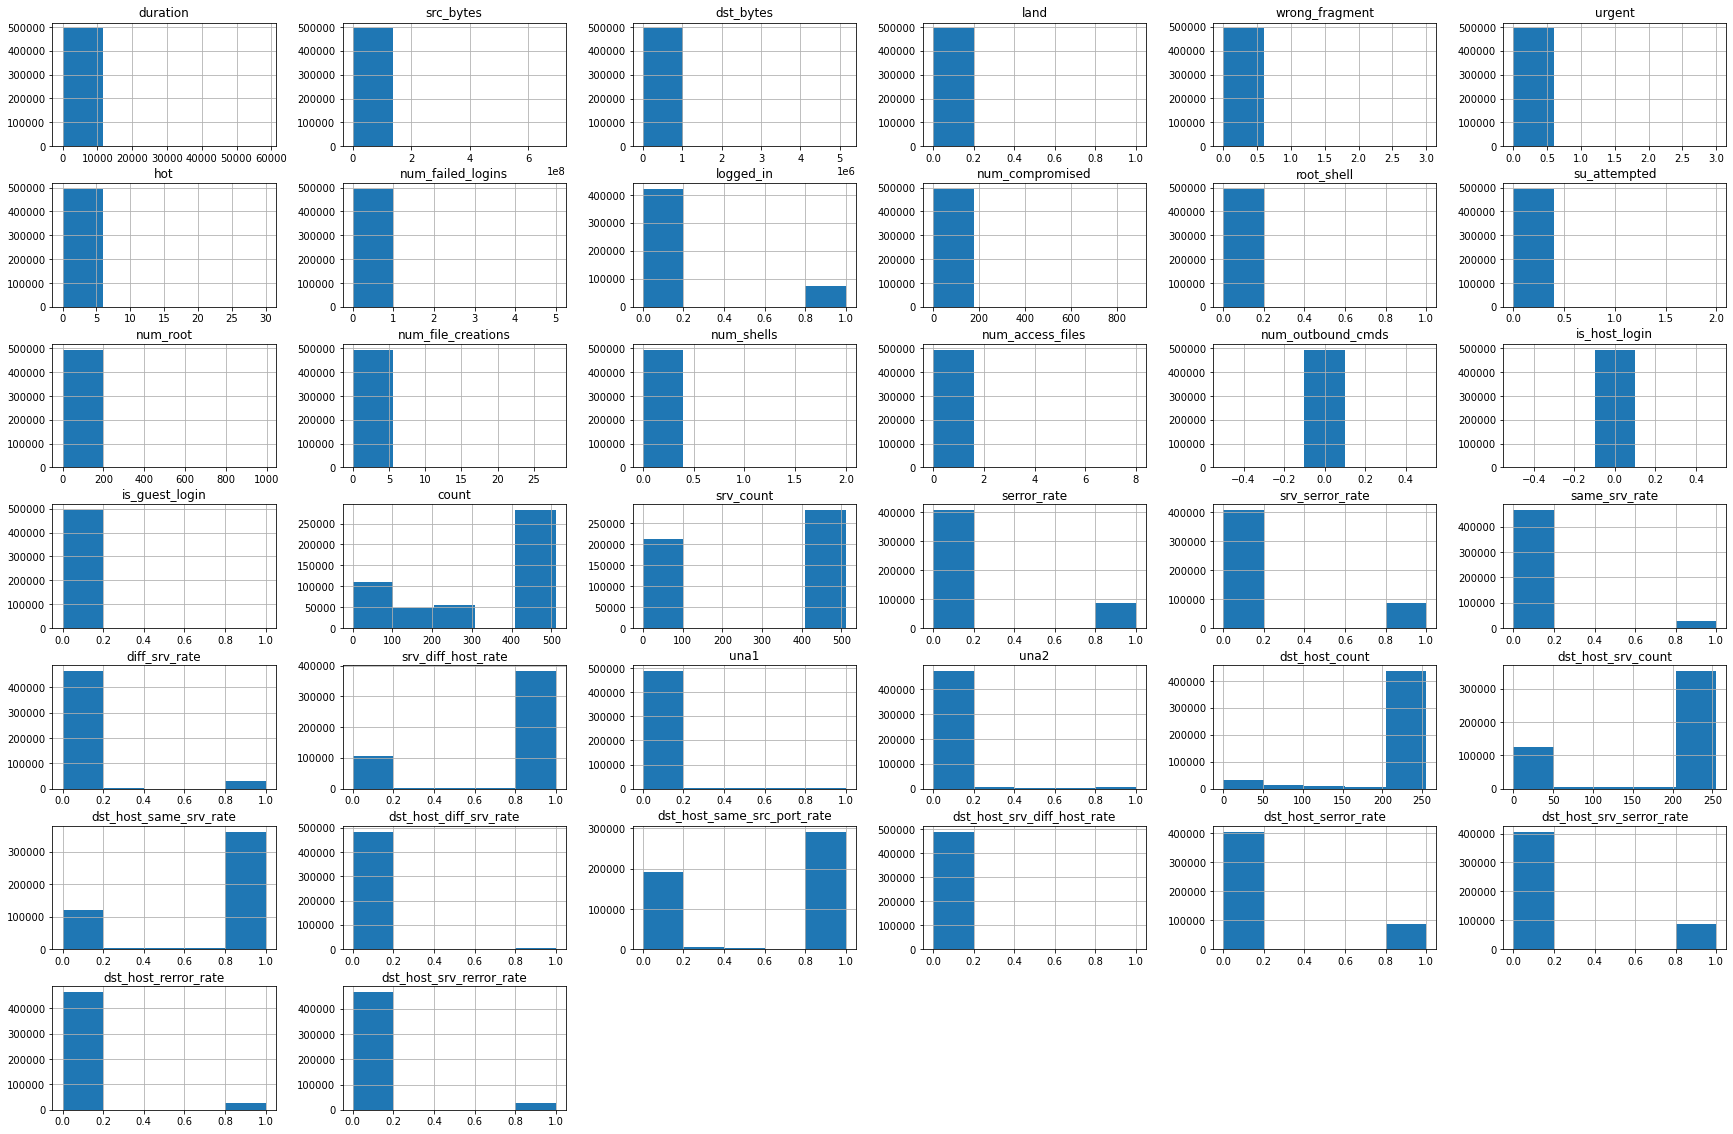

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
corrected.hist(bins=5, figsize=(30,20))
plt.show()

In [8]:
corrected.corr().style.background_gradient(plt.cm.binary, axis=1)

C:\Anaconda\lib\site-packages\pandas\io\formats\style.py:1264: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Anaconda\lib\site-packages\pandas\io\formats\style.py:1265: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,una1,una2,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.004258,0.005440,-0.000452,-0.003235,0.003786,0.013213,0.005239,-0.017265,0.058095,0.021340,0.055853,0.056766,0.074562,-0.000169,0.025661,nan,nan,0.023424,-0.105153,-0.080250,-0.031416,-0.031378,0.012053,0.012106,0.021771,0.051800,-0.011790,0.010074,-0.117515,-0.118458,0.406233,0.042642,-0.006983,-0.030400,-0.030612,0.006739,0.010465
src_bytes,0.004258,1.000000,-0.000002,-0.000020,-0.000139,-0.000005,0.004483,-0.000027,0.001701,0.000119,-0.000022,-0.000010,-0.000010,0.000013,0.000005,-0.000052,nan,nan,-0.000082,-0.003098,-0.002501,0.001558,0.001114,0.000591,0.001379,-0.001860,0.006207,-0.000015,-0.001743,-0.003212,-0.002052,0.000578,-0.000724,0.001186,-0.000718,0.001122,-0.000393,0.001328
dst_bytes,0.005440,-0.000002,1.000000,-0.000175,-0.001254,0.016288,0.004365,0.049330,0.047814,0.023298,0.031680,0.075656,0.020746,0.004958,0.000144,0.008746,nan,nan,0.001289,-0.040373,-0.030544,-0.011908,-0.011930,-0.006166,-0.005808,0.014002,-0.005702,0.008135,-0.048869,-0.005850,0.007058,-0.005314,-0.020143,0.008707,-0.011334,-0.011235,-0.005000,-0.005471
land,-0.000452,-0.000020,-0.000175,1.000000,-0.000318,-0.000017,-0.000295,-0.000065,-0.002784,-0.000038,-0.000070,-0.000031,-0.000038,-0.000075,-0.000066,-0.000184,nan,nan,-0.000249,-0.010260,-0.007886,0.013898,0.014422,-0.000777,-0.001659,0.002286,0.002282,0.036985,-0.023671,-0.011587,0.001984,-0.000333,0.003799,0.083320,0.012658,0.007795,-0.001511,-0.001665
wrong_fragment,-0.003235,-0.000139,-0.001254,-0.000318,1.000000,-0.000123,-0.002106,-0.000467,-0.019908,-0.000271,-0.000504,-0.000223,-0.000269,-0.000536,-0.000473,-0.001319,nan,nan,-0.001778,-0.061934,-0.047789,-0.013969,-0.022119,-0.011529,-0.011865,0.017416,-0.007077,0.000153,-0.005191,-0.058624,-0.054903,0.071857,-0.031803,0.012092,-0.019091,-0.022104,0.029774,-0.011904
urgent,0.003786,-0.000005,0.016288,-0.000017,-0.000123,1.000000,0.000356,0.141996,0.006164,0.014285,0.034790,-0.000012,0.009476,0.015211,-0.000026,0.020068,nan,nan,-0.000096,-0.003997,-0.003047,-0.001193,-0.001192,-0.000638,-0.000639,0.001381,-0.000656,-0.000524,-0.007139,-0.004540,-0.003279,0.010536,-0.002002,-0.000408,-0.001194,-0.001191,-0.000648,-0.000641
hot,0.013213,0.004483,0.004365,-0.000295,-0.002106,0.000356,1.000000,0.008740,0.105305,0.007348,0.024065,-0.000206,0.000998,0.025247,0.006373,0.001902,nan,nan,0.843572,-0.068451,-0.052164,-0.020264,-0.020217,-0.008305,-0.005821,0.022697,-0.002686,0.001973,-0.026366,-0.038730,-0.029117,0.001319,-0.052923,-0.004467,-0.019491,-0.020201,-0.006541,-0.007749
num_failed_logins,0.005239,-0.000027,0.049330,-0.000065,-0.000467,0.141996,0.008740,1.000000,-0.001145,0.006907,0.036983,0.117117,0.003250,0.003948,-0.000097,0.003305,nan,nan,-0.000365,-0.015184,-0.011578,-0.003169,-0.003850,0.025167,0.025098,0.004581,0.003850,-0.001992,-0.025444,-0.015413,0.000507,0.001017,-0.009565,0.016001,-0.001945,-0.002453,0.024753,0.023584
logged_in,-0.017265,0.001701,0.047814,-0.002784,-0.019908,0.006164,0.105305,-0.001145,1.000000,0.013612,0.025293,0.011207,0.013519,0.026923,0.023776,0.066233,nan,nan,0.089318,-0.634643,-0.478122,-0.191698,-0.191113,-0.099137,-0.094372,0.219685,-0.072692,0.330673,-0.621029,0.119315,0.161070,-0.061151,-0.461558,0.140493,-0.190955,-0.191704,-0.090868,-0.087885
num_compromised,0.058095,0.000119,0.023298,-0.000038,-0.000271,0.014285,0.007348,0.006907,0.013612,1.000000,0.255557,0.701400,0.993828,0.010934,0.009341,0.412238,nan,nan,-0.000212,

In [9]:
result =  []
for x in corrected['result']:
    if x != 'normal.':
        result.append("attack")
    else:
        result.append("normal")

In [10]:
len(result)

494021

In [11]:
corrected['result'] = result

In [12]:
corrected['result'].value_counts()

attack    396743
normal     97278
Name: result, dtype: int64

In [13]:
corrected.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'una1', 'una2', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'result'],
      dtype='object')

In [14]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(corrected.loc[:, corrected.columns != 'result'], corrected['result'])

print('Original dataset shape', corrected['result'].shape)
print('Resample dataset shape', y_ros.shape)

Original dataset shape (494021,)
Resample dataset shape (793486,)


In [15]:
print('Original dataset shape', corrected['result'].shape)
print('Resample dataset shape', y_ros.shape)

Original dataset shape (494021,)
Resample dataset shape (793486,)


In [16]:
y_ros.value_counts()

attack    396743
normal    396743
Name: result, dtype: int64

In [17]:
corrected['result'].value_counts()

attack    396743
normal     97278
Name: result, dtype: int64

In [18]:
x_ros.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

onehot=OneHotEncoder()
cat_attr = ['protocol_type','service','flag']

pipeline = ColumnTransformer([("onehot", onehot,cat_attr)])
x_transformed = pipeline.fit_transform(x_ros).toarray()


In [20]:
x_transformed.shape

(793486, 80)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_transformed,y_ros,test_size=0.2,random_state=42)

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [23]:
y_pred = dt.predict(X_test)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      attack       1.00      0.99      0.99     79358
      normal       0.99      1.00      0.99     79340

    accuracy                           0.99    158698
   macro avg       0.99      0.99      0.99    158698
weighted avg       0.99      0.99      0.99    158698



In [25]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()

In [26]:
gb.fit(X_train,y_train)


GaussianNB()

In [27]:
y_pred_gb = gb.predict(X_test)

In [28]:
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

      attack       1.00      0.22      0.36     79358
      normal       0.56      1.00      0.72     79340

    accuracy                           0.61    158698
   macro avg       0.78      0.61      0.54    158698
weighted avg       0.78      0.61      0.54    158698

